In [51]:
import torch
from torch.optim import SGD
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

In [52]:
INPUT_DIMENSION=6
OUTPUT_DIMENSION=1
EPOCHS=500
LR=0.01

In [53]:
X_real=torch.tensor([[1,0,0,0,0,1],
                     [0,-1,0,0,0,-1],
                     [0,0,-1,0,0,-1],
                     [0,0,0,1,0,1],
                     [0,0,0,0,-1,-1]]).float()

y_real=torch.tensor([1,-1,-1,1,-1]).float()

X_random=torch.tensor([[1,0,0,0,0,0],
                       [0,-1,0,0,0,0],
                       [0,0,-1,0,0,0],
                       [0,0,0,1,0,0],
                       [0,0,0,0,-1,0]]).float()

y_random=torch.tensor([1,-1,-1,1,-1]).float()

trainX_real=X_real[0:4]
testX_real=X_real[-1]
trainY_real=y_real[0:4]
testY_real=y_real[-1]

trainX_random=X_random[0:4]
testX_random=X_random[-1]
trainY_random=y_random[0:4]
testY_random=y_random[-1]


In [54]:
class LinearClassifier(torch.nn.Module):
  def __init__(self):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(in_features=INPUT_DIMENSION, out_features=OUTPUT_DIMENSION, bias=False)

  def forward(self, x):
    x = self.linear(x)
    return x

In [55]:
model_real=LinearClassifier()

model_real.linear.weight=torch.nn.Parameter(torch.zeros(INPUT_DIMENSION))

opt = SGD(model_real.parameters(), lr=LR)
lossFunc = nn.MSELoss()

trainLoss_real = []
testLoss_real=[]

w_1_real=[]
w_6_real=[]

parameter_gradients_1_real=[]
parameter_gradients_6_real=[]

initial_loss_gradient_real=[]

for epoch in range(0, EPOCHS):

	w=model_real.linear.weight.detach().numpy()

	w_1_real.append(w[0])
	w_6_real.append(w[-1])

	model_real.train()
	if epoch==0:
		for x,y in zip(trainX_real, trainY_real):
			prediction=model_real(x)
			loss = lossFunc(prediction, y)
			opt.zero_grad()
			loss.backward()
			opt.step()
			initial_loss_gradient_real.append(model_real.linear.weight.grad)
		avg_grad_1=0
		avg_grad_6=0
		for grad in initial_loss_gradient_real:
			avg_grad_1+=grad[0]/4
			avg_grad_6+=grad[-1]/4
		parameter_gradients_1_real.append(avg_grad_1)
		parameter_gradients_6_real.append(avg_grad_6)
	else:
		predictions = model_real(trainX_real)
		loss = lossFunc(predictions, trainY_real)
		opt.zero_grad()
		loss.backward()
		opt.step()

		gradient = model_real.linear.weight.grad
		parameter_gradients_1_real.append(gradient[0])
		parameter_gradients_6_real.append(gradient[-1])

	trainLoss_real.append(loss.item())
	
	with torch.no_grad():
		prediction=model_real(testX_real)
		testLoss_real.append(lossFunc(prediction, testY_real).item())
	if epoch%10==9:
		print("Epoch: {} Train Loss: {:.3f} Test Loss: {:.3f}".format(epoch+1,trainLoss_real[-1], testLoss_real[-1]))

Epoch: 10 Train Loss: 0.544 Test Loss: 0.601
Epoch: 20 Train Loss: 0.328 Test Loss: 0.418
Epoch: 30 Train Loss: 0.198 Test Loss: 0.299
Epoch: 40 Train Loss: 0.119 Test Loss: 0.220
Epoch: 50 Train Loss: 0.072 Test Loss: 0.167
Epoch: 60 Train Loss: 0.043 Test Loss: 0.131
Epoch: 70 Train Loss: 0.026 Test Loss: 0.106
Epoch: 80 Train Loss: 0.016 Test Loss: 0.089
Epoch: 90 Train Loss: 0.009 Test Loss: 0.076
Epoch: 100 Train Loss: 0.006 Test Loss: 0.067
Epoch: 110 Train Loss: 0.003 Test Loss: 0.060
Epoch: 120 Train Loss: 0.002 Test Loss: 0.055
Epoch: 130 Train Loss: 0.001 Test Loss: 0.052
Epoch: 140 Train Loss: 0.001 Test Loss: 0.049
Epoch: 150 Train Loss: 0.000 Test Loss: 0.047
Epoch: 160 Train Loss: 0.000 Test Loss: 0.045
Epoch: 170 Train Loss: 0.000 Test Loss: 0.044
Epoch: 180 Train Loss: 0.000 Test Loss: 0.043
Epoch: 190 Train Loss: 0.000 Test Loss: 0.042
Epoch: 200 Train Loss: 0.000 Test Loss: 0.042
Epoch: 210 Train Loss: 0.000 Test Loss: 0.041
Epoch: 220 Train Loss: 0.000 Test Loss: 0.0

In [56]:
model_random=LinearClassifier()

model_random.linear.weight=torch.nn.Parameter(torch.zeros(INPUT_DIMENSION))

opt = SGD(model_random.parameters(), lr=LR)
lossFunc = nn.MSELoss()

trainLoss_random = []
testLoss_random=[]

w_1_random=[]
w_6_random=[]

initial_loss_gradient_random=[]

parameter_gradients_1_random=[]
parameter_gradients_6_random=[]

for epoch in range(0, EPOCHS):

	w=model_random.linear.weight.detach().numpy()

	w_1_random.append(w[0])
	w_6_random.append(w[-1])

	model_random.train()
	if epoch==0:
		for x,y in zip(trainX_random, trainY_random):
			prediction=model_random(x)
			loss = lossFunc(prediction, y)
			opt.zero_grad()
			loss.backward()
			opt.step()
			initial_loss_gradient_random.append(model_random.linear.weight.grad)
		avg_grad_1=0
		avg_grad_6=0
		for grad in initial_loss_gradient_random:
			avg_grad_1+=grad[0]/4
			avg_grad_6+=grad[-1]/4
		parameter_gradients_1_random.append(avg_grad_1)
		parameter_gradients_6_random.append(avg_grad_6)
	else:
		predictions = model_random(trainX_random)
		loss = lossFunc(predictions, trainY_random)
		opt.zero_grad()
		loss.backward()
		opt.step()

		gradient = model_random.linear.weight.grad
		parameter_gradients_1_random.append(gradient[0])
		parameter_gradients_6_random.append(gradient[-1])
	
	trainLoss_random.append(loss.item())

	with torch.no_grad():
		prediction=model_random(testX_random)
		testLoss_random.append(lossFunc(prediction, testY_random).item())
	if epoch%10==9:
		print("Epoch: {} Train Loss: {:.3f} Test Loss: {:.3f}".format(epoch+1,trainLoss_random[-1], testLoss_random[-1]))

Epoch: 10 Train Loss: 0.886 Test Loss: 1.000
Epoch: 20 Train Loss: 0.802 Test Loss: 1.000
Epoch: 30 Train Loss: 0.725 Test Loss: 1.000
Epoch: 40 Train Loss: 0.656 Test Loss: 1.000
Epoch: 50 Train Loss: 0.594 Test Loss: 1.000
Epoch: 60 Train Loss: 0.537 Test Loss: 1.000
Epoch: 70 Train Loss: 0.486 Test Loss: 1.000
Epoch: 80 Train Loss: 0.439 Test Loss: 1.000
Epoch: 90 Train Loss: 0.397 Test Loss: 1.000
Epoch: 100 Train Loss: 0.360 Test Loss: 1.000
Epoch: 110 Train Loss: 0.325 Test Loss: 1.000
Epoch: 120 Train Loss: 0.294 Test Loss: 1.000
Epoch: 130 Train Loss: 0.266 Test Loss: 1.000
Epoch: 140 Train Loss: 0.241 Test Loss: 1.000
Epoch: 150 Train Loss: 0.218 Test Loss: 1.000
Epoch: 160 Train Loss: 0.197 Test Loss: 1.000
Epoch: 170 Train Loss: 0.178 Test Loss: 1.000
Epoch: 180 Train Loss: 0.161 Test Loss: 1.000
Epoch: 190 Train Loss: 0.146 Test Loss: 1.000
Epoch: 200 Train Loss: 0.132 Test Loss: 1.000
Epoch: 210 Train Loss: 0.119 Test Loss: 1.000
Epoch: 220 Train Loss: 0.108 Test Loss: 1.0

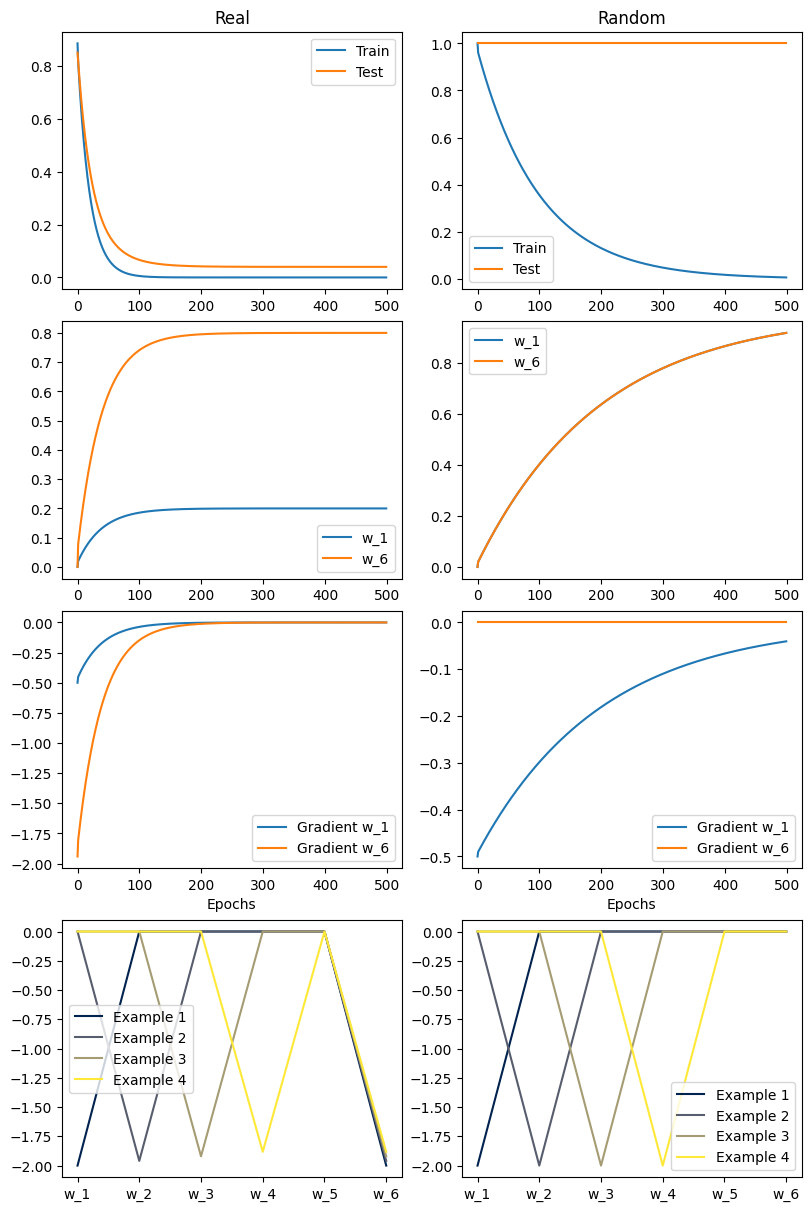

In [61]:
fig, axs = plt.subplots(4,2, figsize=(8,12), layout='constrained')

axs[0,0].plot(np.arange(EPOCHS),trainLoss_real,label='Train')
axs[0,0].plot(np.arange(EPOCHS),testLoss_real,label='Test')
axs[0,0].set_title('Real')
axs[0,0].legend()
axs[0,1].plot(np.arange(EPOCHS),trainLoss_random,label='Train')
axs[0,1].plot(np.arange(EPOCHS),testLoss_random,label='Test')
axs[0,1].set_title('Random')
axs[0,1].legend()

axs[1,0].plot(np.arange(EPOCHS),w_1_real,label='w_1')
axs[1,0].plot(np.arange(EPOCHS),w_6_real,label='w_6')
axs[1,0].legend()
axs[1,1].plot(np.arange(EPOCHS),w_1_random,label='w_1')
axs[1,1].plot(np.arange(EPOCHS),w_1_random,label='w_6')
axs[1,1].legend()

axs[2,0].plot(np.arange(EPOCHS),parameter_gradients_1_real,label='Gradient w_1')
axs[2,0].plot(np.arange(EPOCHS),parameter_gradients_6_real,label='Gradient w_6')
axs[2,0].set_xlabel('Epochs')
axs[2,0].legend()
axs[2,1].plot(np.arange(EPOCHS),parameter_gradients_1_random,label='Gradient w_1')
axs[2,1].plot(np.arange(EPOCHS),parameter_gradients_6_random,label='Gradient w_6')
axs[2,1].set_xlabel('Epochs')
axs[2,1].legend()

colors = plt.cm.cividis(np.linspace(0, 1, 4))

for k, grad in enumerate(initial_loss_gradient_real):
    axs[3,0].plot(np.arange(6),grad,label='Example {}'.format(k+1),c=colors[k])
axs[3,0].set_xticks([0,1,2,3,4,5])
axs[3,0].set_xticklabels(['w_1','w_2','w_3','w_4','w_5','w_6'])
axs[3,0].legend()
for k, grad in enumerate(initial_loss_gradient_random):
    axs[3,1].plot(np.arange(6),grad,label='Example {}'.format(k+1),c=colors[k])
axs[3,1].set_xticks([0,1,2,3,4,5])
axs[3,1].set_xticklabels(['w_1','w_2','w_3','w_4','w_5','w_6'])
axs[3,1].legend()

plt.savefig('plots/Motivating_Example_Plots.png')